Teilaufgabe a.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$f(T)=aT^2+bT+c$ annähern $f_1(T) = T^2$ $ $ $f_2(T) = T$     $f_3(T) = 1$

In [21]:
x = np.arange(0, 110, 10, dtype=np.float64)
x2 = x**2
y = np.array([999.9, 999.7, 998.2, 995.7, 992.2, 988.1, 983.2, 977.8, 971.8, 965.3, 958.4], dtype=np.float64)

In [25]:
A = np.array([x2, x, np.ones(x.shape)])
A = A.T
A

array([[0.0e+00, 0.0e+00, 1.0e+00],
       [1.0e+02, 1.0e+01, 1.0e+00],
       [4.0e+02, 2.0e+01, 1.0e+00],
       [9.0e+02, 3.0e+01, 1.0e+00],
       [1.6e+03, 4.0e+01, 1.0e+00],
       [2.5e+03, 5.0e+01, 1.0e+00],
       [3.6e+03, 6.0e+01, 1.0e+00],
       [4.9e+03, 7.0e+01, 1.0e+00],
       [6.4e+03, 8.0e+01, 1.0e+00],
       [8.1e+03, 9.0e+01, 1.0e+00],
       [1.0e+04, 1.0e+02, 1.0e+00]])

In [26]:
lam = np.linalg.solve(A.T@A, A.T@y)
lam

array([-3.56759907e-03, -6.96946387e-02,  1.00054406e+03])

$y = \lambda_0 \cdot x^2 + \lambda_1 \cdot x + \lambda_2$

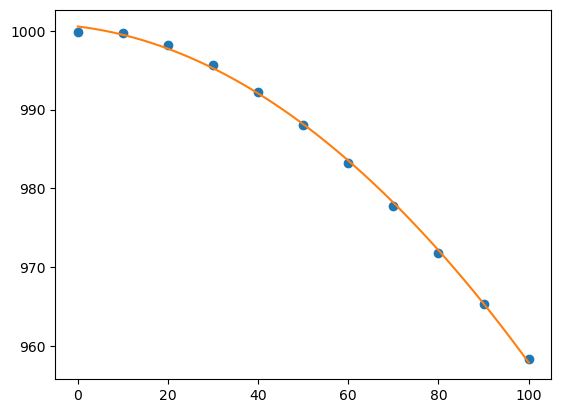

In [37]:
xx=np.linspace(x.min(), x.max())
yy=lam[0]*xx**2+lam[1]*xx+lam[2]

plt.plot(x, y, 'o')
plt.plot(xx, yy)

Mit QR-Zerlegung

In [38]:
Q, R = np.linalg.qr(A)

In [39]:
# R * lambda = Q^T * y
lam = np.linalg.solve(R, Q.T@y)
lam

array([-3.56759907e-03, -6.96946387e-02,  1.00054406e+03])

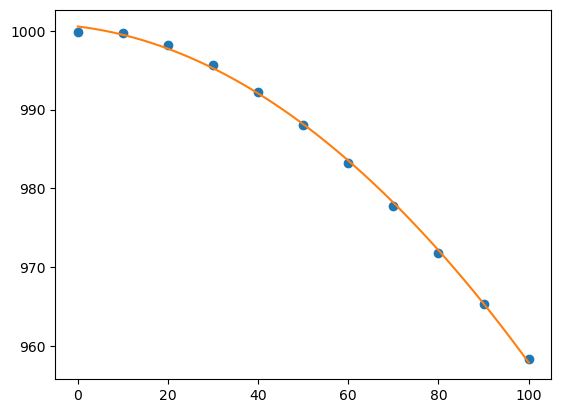

In [40]:
xx=np.linspace(x.min(), x.max())
yy=lam[0]*xx**2+lam[1]*xx+lam[2]

plt.plot(x, y, 'o')
plt.plot(xx, yy)

Teilaufgabe b.)

In [41]:
np.linalg.cond(A@A.T)

1.1896608610847674e+19

In [42]:
np.linalg.cond(R)

12135.51163131216

Die Konditionszahl von R ist viel kleiner

Teilaufgabe c.)

In [48]:
polynom = np.polyfit(x, y, 2)

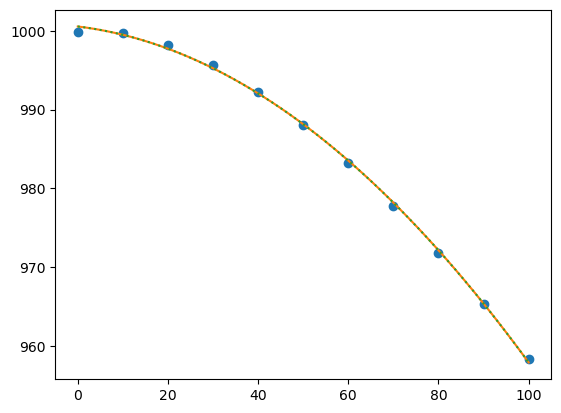

In [52]:
plt.plot(x, y, 'o')
plt.plot(xx, yy)
plt.plot(xx, np.polyval(polynom, xx), linestyle='dotted')

Teilaufgabe d.)

In [58]:
ay = lam[0]*x**2+lam[1]*x+lam[2]
cy = np.polyval(polynom, x)
print(ay-y)
print(cy-y)
print("difference: ", np.abs(ay-y)-np.abs(cy-y))

[ 0.64405594 -0.20965035 -0.47687646 -0.45762238 -0.15188811  0.04032634
  0.31902098  0.3841958   0.33585082  0.07398601 -0.5013986 ]
[ 0.64405594 -0.20965035 -0.47687646 -0.45762238 -0.15188811  0.04032634
  0.31902098  0.3841958   0.33585082  0.07398601 -0.5013986 ]
difference:  [-4.54747351e-13  6.82121026e-13  6.82121026e-13  6.82121026e-13
  6.82121026e-13 -5.68434189e-13 -3.41060513e-13  0.00000000e+00
  2.27373675e-13  5.68434189e-13 -1.13686838e-12]
